## Ejercicio 2

$$\frac{dN}{dt} = r\cdot N$$

### Resolución

$$\begin{split}
\int\frac{dN}{N} &= \int r\cdot dt \\
\ln{|N|} &= r\cdot t + C_1 \\
N &= e^{r\cdot t + C_1} \\
N(t) &= C_2\cdot e^{r\cdot t}
\end{split}$$

### Código

In [7]:
import sympy
import numpy as np 
import matplotlib.pyplot as plt
sympy.init_printing(use_latex='mathjax')

**Datos**

- t = 0 $\rightarrow$ T(0) = 100
- t = 5 $\rightarrow$ T(5) = 400

In [8]:
r, t = sympy.symbols('r t')

N = sympy.Function('N')(t)
edo = sympy.Eq(N.diff(t), r*N)
# Definir la ecuación diferencial
solucion = sympy.dsolve(edo, N)
solucion

           r⋅t
N(t) = C₁⋅ℯ   

In [9]:
# Resolvemos la EDO con datos iniciales
solucion = sympy.dsolve(edo, N, ics={N.subs(t, 0): 100})

solucion

            r⋅t
N(t) = 100⋅ℯ   

In [10]:
# Devolver la parte derecha de la ecuacion
y_sol = solucion.rhs

# Resolvemos para hallar K
k_value = sympy.solve(y_sol.subs(t, 5) - 400, r)
k_value = [i for i in k_value if i.is_real]
k_value

⎡   ⎛ 2/5⎞⎤
⎣log⎝2   ⎠⎦

In [11]:
y_sol  = solucion.subs(r, float(k_value[0]))
y_sol

            0.277258872223978⋅t
N(t) = 100⋅ℯ                   

### Gráfico

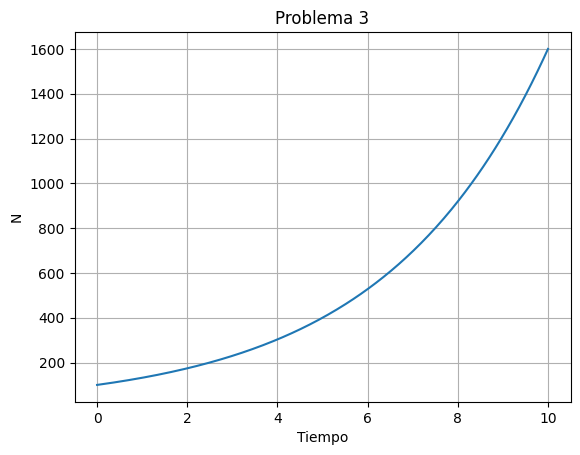

In [12]:
x_vals = np.linspace(0,10,300)
y_sol  = solucion.subs(r, float(k_value[0]))
y_vals = [(y_sol.subs(t,i)).rhs for i in x_vals]

plt.plot(x_vals,y_vals, label='y(t)')
plt.xlabel('Tiempo')
plt.ylabel('N')
plt.title('Problema 3')
plt.grid()
plt.show()